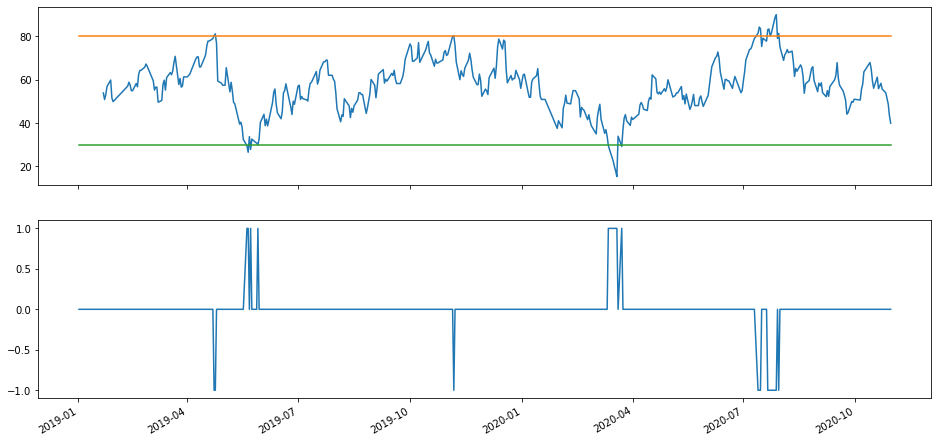

In [20]:
import numpy as np
import pandas as pd
import talib
from datetime import datetime
import matplotlib.pyplot as plt

RawData = open('2330 台積電.csv').readlines()
ReviseData = [line.strip('\n').split(',') for line in RawData[1:]]

StockDate = [datetime.strptime(line[0], '%m/%d/%Y').date() for line in ReviseData]
StockClose = [float(line[1]) for line in ReviseData]

RSIValue = talib.RSI(np.array(StockClose))

strategy = []

for i in range(len(RSIValue)) :
    if float(RSIValue[i]) > 80.0 :
        strategy.append(-1)
    elif float(RSIValue[i]) < 30.0 :
        strategy.append(1)
    else :
        strategy.append(0)

plt.figure(figsize = (16, 8))

plt.subplot(211)
plt.plot(StockDate, RSIValue)
plt.plot(StockDate, [80] * len(StockDate))
plt.plot(StockDate, [30] * len(StockDate))

plt.subplot(212)
plt.plot(StockDate, strategy)

plt.gcf().autofmt_xdate()
plt.show()